# Application of Decision trees and ensemble methods

In the first part, we implement a **Stump**, i.e. a decision tree of depth 1, from scratch. Our tree should be able to handle weighted and unweighted samples, in order for it to be used as a weak learner for
**AdaBoost** in the second part.

Réalisé par :
* Mohamed JARMOUNI
* Mohammed JAWHAR

In [94]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.datasets import make_moons, make_circles, make_classification

The following code creates 3 synthetic datasets, in which there are just two features, for binary classification. 

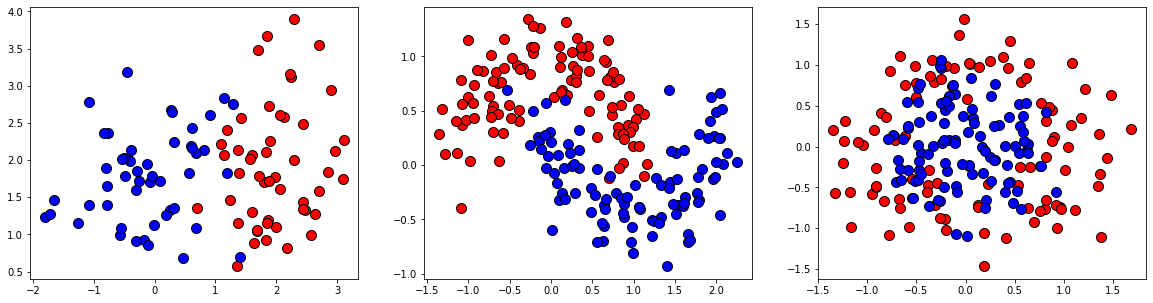

In [95]:
plot_colors = "rb"
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [linearly_separable,
            make_moons(n_samples = 200, noise=0.2, random_state=0),
            make_circles(n_samples = 200, noise=0.3, factor=0.5, random_state=1)
            ]

fig, ax = plt.subplots(1, 3, figsize=(20,5))
for fi in range(len(datasets)):
    dataset = datasets[fi]
    X = dataset[0]
    y = dataset[1]
    n_classes = len(np.unique(y))
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        ax[fi].scatter(X[idx, 0], X[idx, 1], c=color,  cmap=plt.cm.RdYlBu, edgecolor='black', s=100)
dataset = datasets[1]

In [96]:
def plot_tree(clf, X, y):
    n_classes = 2
    plot_colors = "rb"
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    plt.axis("tight")
    # Plot the training points
    for i, color in zip([0,1], plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color,  cmap=plt.cm.Paired)
    plt.show()

## First part: Stumps

In this first part, we code your own class to handle stumps for 2-dimensional data and binary classification (i.e., the class takes value in $\{0, 1\}$).

In [97]:
from sklearn import tree

class My_stump:
    def __init__(self):
        self.best_dimension = None
        self.best_threshold = None
        self.class_bellow_threshold = None
        self.class_above_threshold = None
        self.best_ev = None
        
    def get_threshold(self): return self.best_threshold
  
    def get_best(self): return self.best_dimension,  self.best_threshold, self.best_ev
    
    def gini_impurity(self, y, sample_weight=None):
        g = 0
        if sample_weight is None:
            counts = [(len(y)-np.sum(y))/len(y),np.sum(y)/len(y)]
            gini = 1 - np.sum(counts**2)
            return gini
        else:
            for i in [0, 1]:
                w = sample_weight[y == i].sum()
                p = w / sample_weight.sum()
                g += p**2

            gini = 1 - g
            return gini
            
    
    def fit(self, X, y, sample_weight=None):
        n_classes = 2
        n_features = X.shape[1]
        best_ev = 1
        for i in range(n_features):
            thresholds = np.unique(X[:,i])
            for threshold in thresholds:
                y_bellow_threshold = y[X[:,i] < threshold]
                y_above_threshold = y[X[:,i] >= threshold]
                if(sample_weight is None):
                    weights_bellow_threshold = len(y_bellow_threshold)
                    weights_above_threshold = len(y_above_threshold)
                else :
                    weights_bellow_threshold = sample_weight[X[:,i] < threshold].sum()
                    weights_above_threshold = sample_weight[X[:,i] >= threshold].sum()

                W = weights_bellow_threshold + weights_above_threshold

                if sample_weight is None:
                    gini_bellow_threshold = self.gini_impurity(y_bellow_threshold)
                    gini_above_threshold = self.gini_impurity(y_above_threshold)
                else:
                    gini_bellow_threshold = self.gini_impurity(y_bellow_threshold, sample_weight[X[:,i] < threshold])
                    gini_above_threshold = self.gini_impurity(y_above_threshold, sample_weight[X[:,i] >= threshold])
                ev = (weights_bellow_threshold/W)*gini_bellow_threshold + (weights_above_threshold/W)*gini_above_threshold
                if ev < best_ev:
                    best_ev = ev
                    self.best_dimension = i
                    self.best_threshold = threshold
                    self.class_bellow_threshold = np.argmax(np.bincount(y_bellow_threshold))
                    self.class_above_threshold = np.argmax(np.bincount(y_above_threshold))
        self.best_ev = best_ev
        return self
    
    def predict(self, X) :
        res = []
        for x in X :
            if x[self.best_dimension] < self.best_threshold :
                res.append(self.class_bellow_threshold)
            else :
                res.append(self.class_above_threshold)
        return np.array(res)  

/tmp/ipykernel_53975/2343040921.py:24: RuntimeWarning: invalid value encountered in double_scalars
  p = w / sample_weight.sum()


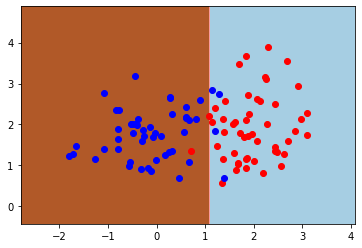

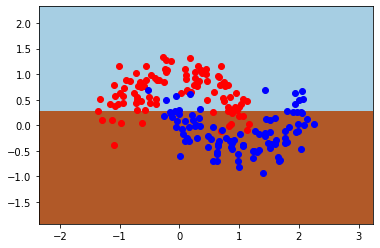

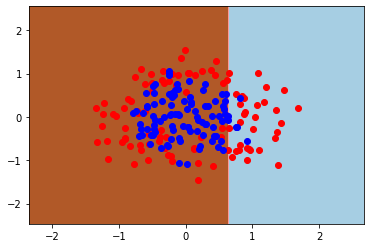

In [98]:
for i in range(0,3):
    dataset = datasets[i]
    X = dataset[0]
    y = dataset[1] # we use 0 and 1 classification instead of 1 and -1
    w = np.ones(len(X)) 

    my_stump = My_stump()  
    my_stump.fit(X, y, w)
    my_stump.predict(X)

    plot_tree(my_stump, X, y)

- Using ```DecisionTreeClassifier``` in ```sklearn```, we fit a stump on the data.

### For the first dataset

In [99]:
dataset = datasets[0]
X = dataset[0]
y = dataset[1] # we use 0 and 1 classification instead of 1 and -1
w = np.ones(len(X)) 

my_stump = My_stump()
my_stump.fit(X, y, w)
my_stump.predict(X)

/tmp/ipykernel_53975/2343040921.py:24: RuntimeWarning: invalid value encountered in double_scalars
  p = w / sample_weight.sum()


array([1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0])

- We compare the dimension of the split, the threshold and the Gini indices obtained through your own code and those of ```sk_stump```.

/tmp/ipykernel_53975/2343040921.py:24: RuntimeWarning: invalid value encountered in double_scalars
  p = w / sample_weight.sum()


Difference in the best threshold: -0.09304920135592831


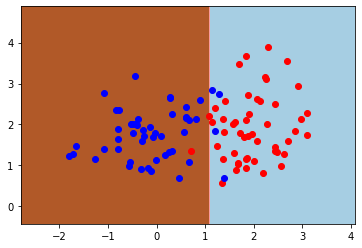

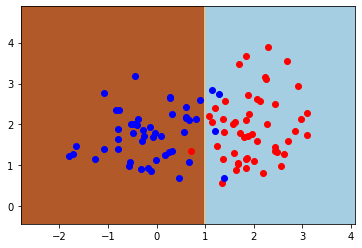

In [100]:

sk_stump = tree.DecisionTreeClassifier(max_depth=1).fit(X, y, sample_weight=w)
my_stump = My_stump()
my_stump.fit(X, y, w)

print("Difference in the best threshold:", sk_stump.tree_.threshold[0] -  my_stump.get_threshold())

plot_tree(my_stump,X,y)
plot_tree(sk_stump,X,y)

### For the second dataset


/tmp/ipykernel_53975/2343040921.py:24: RuntimeWarning: invalid value encountered in double_scalars
  p = w / sample_weight.sum()
/tmp/ipykernel_53975/2343040921.py:24: RuntimeWarning: invalid value encountered in double_scalars
  p = w / sample_weight.sum()


Difference in the best threshold: -0.00045991878579509926


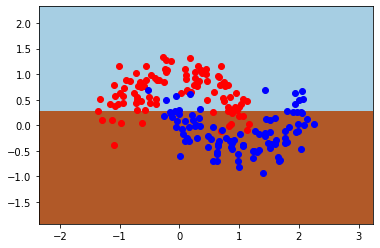

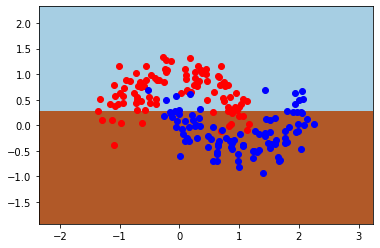

In [101]:
dataset = datasets[1]
X = dataset[0]
y = dataset[1] # we use 0 and 1 classification instead of 1 and -1
w = np.ones(len(X)) 

my_stump = My_stump()
my_stump.fit(X, y, w)
my_stump.predict(X)


sk_stump = tree.DecisionTreeClassifier(max_depth=1).fit(X, y, sample_weight=w)
my_stump = My_stump()
my_stump.fit(X, y, w)

print("Difference in the best threshold:", sk_stump.tree_.threshold[0] -  my_stump.get_threshold())

plot_tree(my_stump,X,y)
plot_tree(sk_stump,X,y)

### For the third dataset

/tmp/ipykernel_53975/2343040921.py:24: RuntimeWarning: invalid value encountered in double_scalars
  p = w / sample_weight.sum()
/tmp/ipykernel_53975/2343040921.py:24: RuntimeWarning: invalid value encountered in double_scalars
  p = w / sample_weight.sum()


Difference in the best threshold: -0.006122997755022563


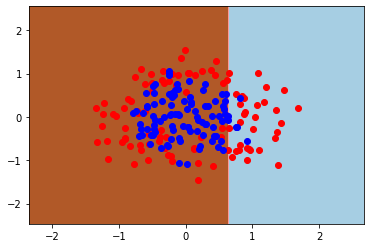

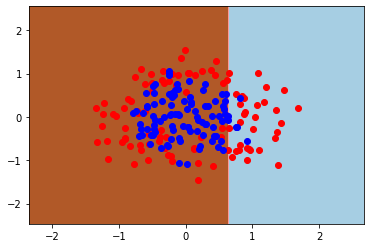

In [102]:
dataset = datasets[2]
X = dataset[0]
y = dataset[1] # we use 0 and 1 classification instead of 1 and -1
w = np.ones(len(X)) 

my_stump = My_stump()
my_stump.fit(X, y, w)
my_stump.predict(X)


sk_stump = tree.DecisionTreeClassifier(max_depth=1).fit(X, y, sample_weight=w)
my_stump = My_stump()
my_stump.fit(X, y, w)

print("Difference in the best threshold:", sk_stump.tree_.threshold[0] -  my_stump.get_threshold())

plot_tree(my_stump,X,y)
plot_tree(sk_stump,X,y)

We observe that both our stump classifier and the decisiontreeclassifier of sklearn give the really close results on all datasets 

## Second part: Adaboost

WE mplement the **AdaBoost** seen in class. We use the ```my_stump``` implemented before. We check the correctness by comparing it to ```sk_stump```.


In [111]:
import pandas as pd

# Compute the error rate of a weak classifier with weights w_m
def compute_error(y, y_pred, w_m):
    error = 0
    for i in range(len(y)):
        if y[i] != y_pred[i]:
            error += w_m[i]
    return error

# Compute alpha 
def compute_alpha(error):
    return 0.5 * np.log((1 - error) / error)

# Compute the update of the weights
def update_weights(w_i, alpha, y, y_pred, error):
    w = []
    for i in range(len(y)):
        z = 2*np.sqrt(error*(1-error))
        if y[i] == y_pred[i]:
            w.append((w_i[i]/z) * np.exp(-alpha))
        else:
            w.append((w_i[i]/z) * np.exp(alpha))
    print(w)
    return np.asarray(w)


class AdaBoost:
    def __init__(self):
        self.alphas = []
        self.G_M = []
        self.M = None
        self.loss_ensemble = []
        
    def predict(self, X):
        weak_preds = pd.DataFrame(index = range(len(X)), columns = range(self.M)) 
        for m in range(len(self.G_M)):
            y_pred_m = self.G_M[m].predict(X) * self.alphas[m]
            weak_preds.iloc[:,m] = y_pred_m
        y_pred = (1 * np.sign(weak_preds.T.sum())).astype(int)
        return y_pred.values

    def fit(self, X, y, M = 10):
        self.alphas = [] 
        self.training_errors = []
        self.M = M
        Z=1
        for m in range(0, M):# Iterate over M weak classifiers
            if m == 0:
                w_m = np.ones(len(y)) * 1 / len(y) 
            else:
                w_m = update_weights(w_m, alpha_m, y, y_pred, error_m)

            G_m = My_stump() # Initialize a new weak classifier
            G_m.fit(X, y, w_m) # Fit the weak classifier
            y_pred = G_m.predict(X) # Predict with the weak classifier
            error_m = compute_error(y, y_pred, w_m) # Compute the error rate
            alpha_m = compute_alpha(error_m) # Compute the alpha

            self.G_M.append(G_m) # Save to list of weak classifiers
            self.alphas.append(alpha_m)
            Z = Z * (2 * np.sqrt(error_m * (1 - error_m)))
            self.loss_ensemble.append(Z)
        

- We run the code for 20 iterations. At each iteration, plot the result of the ensemble of AdaBoost ```ab``` using ```plot_tree(ab, X, y)```
- Then we plot the evolution of the loss in the 20 iterations.

/tmp/ipykernel_53975/2343040921.py:24: RuntimeWarning: invalid value encountered in double_scalars
  p = w / sample_weight.sum()


[0.0028735632183908046, 0.0028735632183908046, 0.0028735632183908046, 0.019230769230769225, 0.0028735632183908046, 0.0028735632183908046, 0.0028735632183908046, 0.0028735632183908046, 0.0028735632183908046, 0.0028735632183908046, 0.0028735632183908046, 0.0028735632183908046, 0.0028735632183908046, 0.0028735632183908046, 0.0028735632183908046, 0.019230769230769225, 0.0028735632183908046, 0.0028735632183908046, 0.0028735632183908046, 0.0028735632183908046, 0.0028735632183908046, 0.0028735632183908046, 0.0028735632183908046, 0.0028735632183908046, 0.0028735632183908046, 0.0028735632183908046, 0.0028735632183908046, 0.0028735632183908046, 0.0028735632183908046, 0.0028735632183908046, 0.0028735632183908046, 0.0028735632183908046, 0.0028735632183908046, 0.019230769230769225, 0.0028735632183908046, 0.0028735632183908046, 0.0028735632183908046, 0.019230769230769225, 0.0028735632183908046, 0.019230769230769225, 0.0028735632183908046, 0.0028735632183908046, 0.0028735632183908046, 0.0028735632183

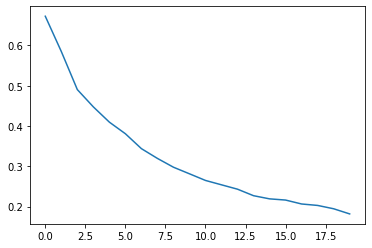

/tmp/ipykernel_53975/3307804179.py:39: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  weak_preds.iloc[:,m] = y_pred_m


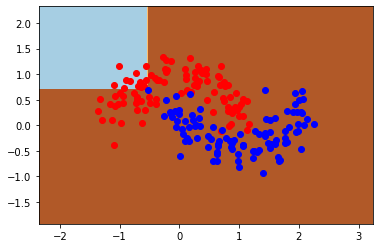

In [112]:
from sklearn.tree import DecisionTreeClassifier
X = datasets[1][0]
y = datasets[1][1]

ab = AdaBoost()
ab.fit(X, y, M = 20)
plt.plot(ab.loss_ensemble)
plt.show()
plot_tree(ab, X, y)